In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!pip3 install konlpy

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 86 kB 4.7 MB/s 
     |████████████████████████████████| 448 kB 46.1 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from konlpy.tag import Okt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import nltk

from pprint import pprint

## 데이터 불러오기

In [43]:
current_dir = "/content/drive/MyDrive/[TR] 제주도 관광 데이터분석/"

In [44]:
df = pd.read_csv(current_dir + 'data/naver_2020_07.csv')
df.head(2)

,날짜,네이버/티스토리,관광 명소,제목,내용,url,글쓴이
0,2020. 7. 1. 8:40,네이버,제주 여행,"제주여행 렌트카 타고 즐기는 제주카페 1탄 : 공백, 구좌상회, 카페마니, 아줄레주...","제주여행 렌트카 타고 즐기는 제주 카페 1탄\n공백, 구좌상회, 카페마니, 아줄레주...",https://blog.naver.com/wkwmd81/222016918018,고고씽
1,2020. 7. 27. 22:11,네이버,제주 여행,제주 여행 돈내코 원앙폭포 아침 산책 feat. 캐논 5D Mark4,제주 여행을 다녀온 지도 약간의 시간이 지나버렸네요. \n빠르게 포스팅을 하려고 해...,https://blog.naver.com/voued/222043524697,산소사랑


## 전처리

In [6]:
df.isna().sum()

날짜            0
네이버/티스토리      0
관광 명소         0
제목            0
내용          226
url           0
글쓴이           5
dtype: int64

In [7]:
df = df.dropna(axis=0).reset_index()

In [14]:
def kor_preprocessing(text):
    okt = Okt()
    total_tokens = okt.nouns(text)
    total_tokens = [token for token in total_tokens if token not in SW and len(token) > 1]
    
    return total_tokens

In [36]:
# 불용어 설정
SW = {"제주", "제주도", "여행"}

In [37]:
contents = list(df['내용'])
kor_tokens = [kor_preprocessing(doc) for doc in contents]
kor_total_tokens = []
for L in kor_tokens:
    kor_total_tokens += L
 
kor_total_tokens[:2]

['렌트카', '타고']

In [38]:
text = nltk.Text(kor_total_tokens)
print("토큰 개수: ", len(set(text.tokens)))
pprint(text.vocab().most_common(10))

토큰 개수:  28039
[('사진', 7464),
 ('카페', 4927),
 ('우리', 4574),
 ('숙소', 4196),
 ('시간', 4191),
 ('진짜', 3880),
 ('사람', 3760),
 ('바다', 3713),
 ('정말', 3504),
 ('생각', 3383)]


In [48]:
text.vocab().most_common(100)

[('사진', 7464),
 ('카페', 4927),
 ('우리', 4574),
 ('숙소', 4196),
 ('시간', 4191),
 ('진짜', 3880),
 ('사람', 3760),
 ('바다', 3713),
 ('정말', 3504),
 ('생각', 3383),
 ('바로', 3205),
 ('여기', 3054),
 ('도착', 2621),
 ('하나', 2513),
 ('날씨', 2479),
 ('호텔', 2413),
 ('그냥', 2354),
 ('다음', 2203),
 ('맛집', 2152),
 ('공항', 2132),
 ('정도', 2081),
 ('다시', 2067),
 ('아침', 2042),
 ('느낌', 2002),
 ('예약', 1931),
 ('근처', 1929),
 ('때문', 1927),
 ('보고', 1843),
 ('추천', 1837),
 ('주문', 1815),
 ('이번', 1807),
 ('조금', 1803),
 ('아이', 1774),
 ('저녁', 1676),
 ('마지막', 1612),
 ('커피', 1593),
 ('처음', 1572),
 ('비행기', 1517),
 ('저희', 1502),
 ('코스', 1497),
 ('방문', 1469),
 ('구경', 1461),
 ('해변', 1458),
 ('친구', 1452),
 ('돼지', 1423),
 ('한번', 1410),
 ('아주', 1400),
 ('메뉴', 1388),
 ('가격', 1376),
 ('수국', 1372),
 ('타고', 1366),
 ('시작', 1360),
 ('주차', 1346),
 ('오늘', 1339),
 ('이용', 1309),
 ('사실', 1308),
 ('마음', 1305),
 ('식당', 1301),
 ('우도', 1281),
 ('다른', 1271),
 ('오름', 1267),
 ('일정', 1225),
 ('역시', 1215),
 ('주차장', 1207),
 ('고기', 1195),
 ('이제', 1178),
 ('자리',

## 워드클라우드 생성

In [45]:
def make_wordcloud(text, topN):
    font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
    mask = np.array(Image.open(current_dir + "data/cloud.png"))

    wordcloud = WordCloud(width = 800, height = 800, 
                          mask=mask,
                          background_color='white',
                          font_path = font_path, 
                          colormap="twilight",   
                          min_font_size = 10
                          )

    cloud = wordcloud.generate_from_frequencies(dict(text.vocab().most_common(topN)))
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(cloud) 
    plt.axis("off") 
    plt.tight_layout() 

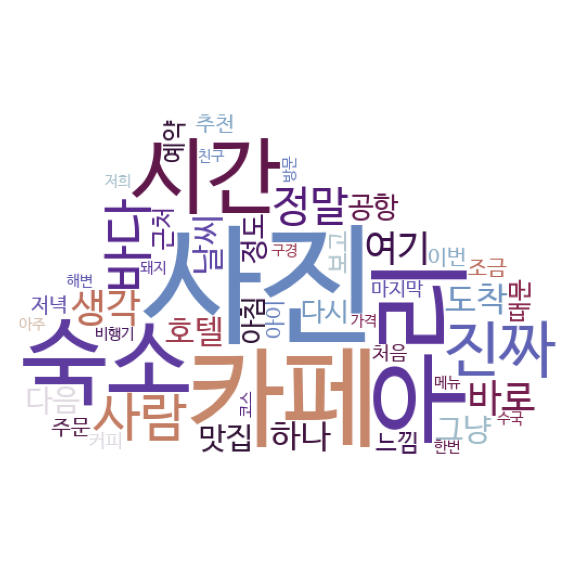

In [46]:
make_wordcloud(text, 50)